# Chapter 8: Dimensionality Reduction
-----
-----

Having thousands of features for each instance will slow down training and also make finding a solution difficult. _curse of dimensionality_

Also useful for data visualization, reducing dimensions to two or three make it possible to plot.

## The Curse of Dimensionality
-----

The more dimensions, the greater chance of overfitting.

## Main Approaches for Dimensionality Reduction
-----

two main ways:
- projection
- manifold learning

#### Projection

Most training instances not spread out uniformly across all dimensions. Some are contant, others are correlated, which means all training instances lie within a much lower-dimensional subspace. 

#### Manifold Learning

d-dimensional manifold is part of an n-dimensional space (d<n) that locally resembles a d-dimensional hyperplane. learn to model the manifold on which the training instance lie.

- manifold hypothesis: most real world high-dimensional dataset lie close to a much lower-dimenional manifold

## PCA (Principal Component Analysis)
-----

First identifies the hyperplane that lies closest to the data and then projects the data onto it.

#### Preserving the Variance

Select hyperplane that preserves the maximum amount of variance, less information loss.

#### Principal Components

- finds axis for larges amount of variance
- finds second axis, othogonal to the 1st axis
- repeat for all dimensions

the unit vector that defines the ith axis is called the ith _principal component_ .

We can use Single Value Decomposition

#### Projecting Down To d Dimensions

you can then project down using the first d pricipal components

#### Using Sklearn

In [15]:
from sklearn.datasets import fetch_mldata
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import numpy as np
mnist = fetch_mldata('MNIST original')
X,y = mnist["data"], mnist['target']
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X2D

/home/thomas/Documents/dataScience/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/thomas/Documents/dataScience/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


array([[1010.49523674, -289.95079705],
       [1033.56182583, -351.17439939],
       [ 615.42344191, -244.26120768],
       ...,
       [-134.30193632,  759.48287226],
       [  13.21601353,  870.41730267],
       [ 341.04898254,  959.32285969]])

In [17]:
pca.components_.T[:,0]

array([-3.65629395e-19, -3.30413913e-18,  8.42871060e-19, -1.51892381e-19,
        1.30123495e-20,  6.58671603e-21,  1.06997551e-20,  7.87675731e-21,
        4.83400865e-23, -3.55528194e-22, -1.11690475e-22,  0.00000000e+00,
       -9.45584141e-07, -3.72372964e-06, -1.83972471e-06, -7.66551962e-08,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.16825939e-07,  4.29493484e-07,  4.87705923e-06,  1.65230139e-05,
        2.20363486e-05,  3.88808794e-05,  7.40608768e-05,  8.83250303e-05,
        8.08497862e-05,  8.95695706e-05,  1.06176802e-04,  7.93599894e-05,
        3.60814767e-05,  3.08091710e-05,  2.39077254e-05,  3.64540292e-06,
       -2.94188521e-06,  1.88454640e-06,  1.14902361e-06,  4.83410242e-07,
        0.00000000e+00,  

#### Explained Variance Ratio
Indicates the proportion of the datasets variance that lies along axis of each principal component

In [18]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445])

this tells use that 9.75% of variance is in first axis, 7.16% on second axis, and the remaining % is on the other axis. So lots of imformation loss.

#### Choosing the Right Number of Dimensions

choosing a number of dimensions that make up large portion of the variance about 95%

In [19]:
pca2 = PCA()
pca2.fit(X)
cumsum = np.cumsum(pca2.explained_variance_ratio_)
d = np.argmax(cumsum >= .95) + 1
print(d)
pcad = PCA(d)
# better way

154


In [26]:
# if 0 < n_components < 1 theit say the variance you want to preserve
pca95 = PCA(n_components=0.99)
pca95.fit(X)
len(pca95.explained_variance_ratio_)

331

#### PCA for Compression

Above shows us that PCA redeced the number of features to 154 from 784 while keeping 95% of the variance, this is only 20% of the original size.
We decompress the reduced databack by applying the inverse transform on the PCA projection, this will not be the original, but close. The mean squared distance between the original and the recontructed is called the _recontruction error_

In [24]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)

In [28]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

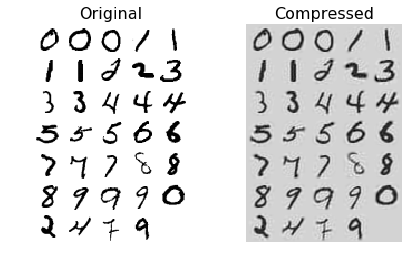

In [29]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

#### Incremental PCA
previous algo require training set to fit in memory. So there are IPCA to solve the issue, which can be used on large training sets and to apply PCA online

In [30]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X,n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X)

In [31]:
filename = "my_mnist.data"
m, n = X.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X


del X_mm

X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=700, copy=True, n_components=154, whiten=False)

#### Randomized PCA

stochastic algo that quickly find an approximation of the first d pricipal components.

In [33]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X)

## Kernel PCA
-----
preform complex nonlinear projections for dimensionality reducion
- good at preserving clusters of instances
- unrolling dataset that lie close to a twisted manifold.



In [36]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X[:10000], y[:10000])

#### Selecting A Kernel and Tuning Hyperparameters

kPCA is unsupervised learning algo, no obvious preformance measure to help select the best kernel and hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np
clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)

grid_search.fit(X, y)

In [ ]:
print(grid_search.best_params_)

## LLE (Local Linear Embedding)
-----

Manifold learning technique, does not rely on projections.

measuesing how each training instance linearly relates to its closest neighbors, then look for low-dimensional representation of the training set where these local relationships are best preserved

In [43]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [44]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

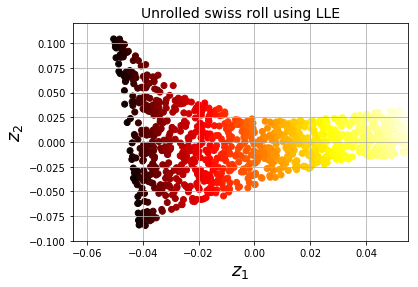

In [45]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

## Other Dimensionality Reduction Techniques
-----

- Multidimensional scaling
- Isomap
- t-Distributed Stochastic Neighbor Embedding
- Linear Discriminant Analysis

## Exercises
-----

1. reducing a datasets dimensionality will make it easier faster to train and more likely to find a generalized solution, as well as reducing the amount of memory needed and useful to vizualize. Main drawbacks are some information is lost, is computationally costly, ml pipeline become more complex.
2. is it that most problem are in high dimensional space, meaning that randomly sample high dimensional vectors are sparse which leads to overfitting if we don't have enough data.
3. no it possible to reverse to 100% the original data since some of it was lost but, by applying the inverse transpose when using PCA we can get a dataset that is similar to the original. While using kPCA it not very easy to reverse.
4. Depends on the dataset, some may not reducable.
5. Depends on the dataset.
6. PCA if data fits in memory, incremental if it doesn't. random when it fits in memory and you want to reduce the dimension significantly. kPCA for non-linear datasets.
7. if not too much of the data was lost and the dimensionality was reduced significantly then its good. Often use the second algorithm(classification, regression) to check it.
8. Yes it makes sense. Applying PCA to remove the useless dimensions and then LLE which is slower on the reduced dataset will go faster. and will produce the same outcome as just using LLE. 